# Full network estimations of number of active tunings vs D

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from disp import set_plot
from ntwk import SoftmaxNtwk

# Full network simulations

In [2]:
NTR = 11
# N = 1000
N = 3500

DS = np.arange(2, 16)

In [3]:
def get_active(ths, t_1):
    ths_mn = ths[t_1:, :].mean(0)  # ppln time average
    matv = ths_mn > np.max(ths_mn/2)  # mask over active labels
    iatv = matv.nonzero()[0]  # idxs of active labels
    return iatv

## Mean-driven simulation

Here we use $\mu_0 = 1.5$.

In [4]:
t_max = 100

mu_0_md = 1.5
mu_1_md = 0
sgm_0_md = 1
sgm_1_md = 1

ths_alls = []

for D in DS:

    MU_J = np.nan*np.zeros((D, D))
    MU_J[np.eye(D, dtype=bool)] = mu_0_md
    MU_J[~np.eye(D, dtype=bool)] = mu_1_md

    SGM_J = np.nan*np.zeros((D, D))
    SGM_J[np.eye(D, dtype=bool)] = sgm_0_md
    SGM_J[~np.eye(D, dtype=bool)] = sgm_1_md

    J = np.nan*np.zeros((D, D, N, N))

    for d_to in range(D):
        for d_from in range(D):
            J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

    ntwk = SoftmaxNtwk(J)
    
    sys.stdout.write('>')

    ths_all = []
    
    for ctr in range(NTR):
        x_0 = np.random.randn(N, D)
        g = np.inf
        
        t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)
        
        ths = ys.mean(axis=1)
        
        ths_all.append(ths)
        
    ths_alls.append(ths_all)

>............................................>............................................>............................................>............................................>............................................>............................................>............................................>............................................>............................................>............................................>............................................>............................................>............................................>............................................

In [5]:
q_med_mds = []
for ths_all in ths_alls:
    q_med_md = np.median([len(get_active(ths, t_max//2)) for ths in ths_all])
    q_med_mds.append(q_med_md)

print('MED(Q) =', q_med_mds)

MED(Q) = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]


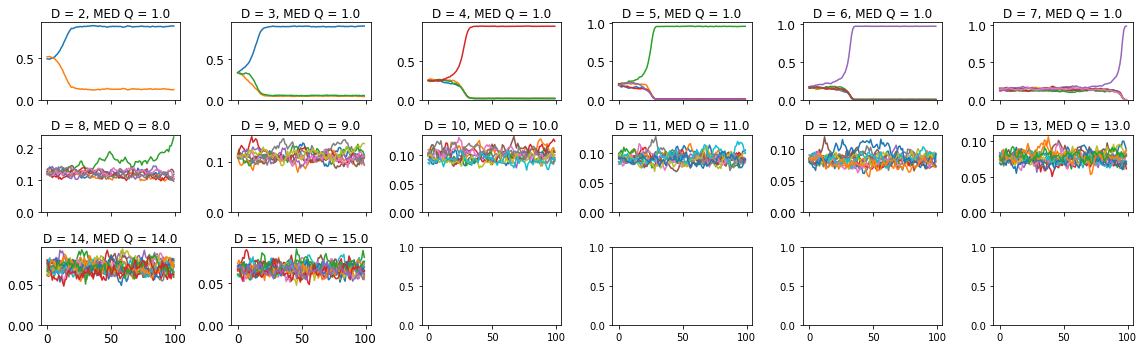

In [6]:
fig, axs = plt.subplots(3, 6, figsize=(16, 5), tight_layout=True, sharex=True)
for ax, D, ths_all, q_med_md in zip(axs.flat, DS, ths_alls, q_med_mds):
    ths = ths_all[0]
    ax.plot(ths)
    ax.set_ylim(bottom=0)
    set_plot(ax, title=f'D = {D}, MED Q = {q_med_md}')

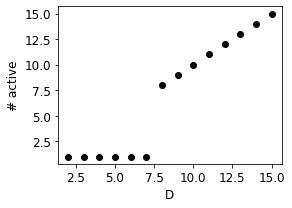

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
ax.scatter(DS, q_med_mds, c='k')
set_plot(ax, x_label='D', y_label='# active')

## Fluctuation-driven simulation

We use $\mu_0 = \mu_1 = 0$, $\sigma_0 = 1$, $\sigma_1 = 0$.

In [8]:
t_max = 150

mu_0_fd = 0
mu_1_fd = 0
sgm_0_fd = 1
sgm_1_fd = 0

ths_alls = []
    
for D in DS:

    MU_J = np.nan*np.zeros((D, D))
    MU_J[np.eye(D, dtype=bool)] = mu_0_fd
    MU_J[~np.eye(D, dtype=bool)] = mu_1_fd

    SGM_J = np.nan*np.zeros((D, D))
    SGM_J[np.eye(D, dtype=bool)] = sgm_0_fd
    SGM_J[~np.eye(D, dtype=bool)] = sgm_1_fd

    J = np.nan*np.zeros((D, D, N, N))

    for d_to in range(D):
        for d_from in range(D):
            J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

    ntwk = SoftmaxNtwk(J)
    
    sys.stdout.write('>')

    ths_all = []
    
    for ctr in range(NTR):
        x_0 = np.random.randn(N, D)
        g = np.inf
        
        t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)
        
        ths = ys.mean(axis=1)

        ths_all.append(ths)
        
    ths_alls.append(ths_all)

>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>.............................................................................>...............................................................

In [9]:
q_med_fds = []
for ths_all in ths_alls:
    q_med_fd = np.median([len(get_active(ths, t_max//2)) for ths in ths_all])
    q_med_fds.append(q_med_fd)

print('MED(Q) =', q_med_fds)

MED(Q) = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 9.0, 8.0, 9.0, 9.0, 8.0]


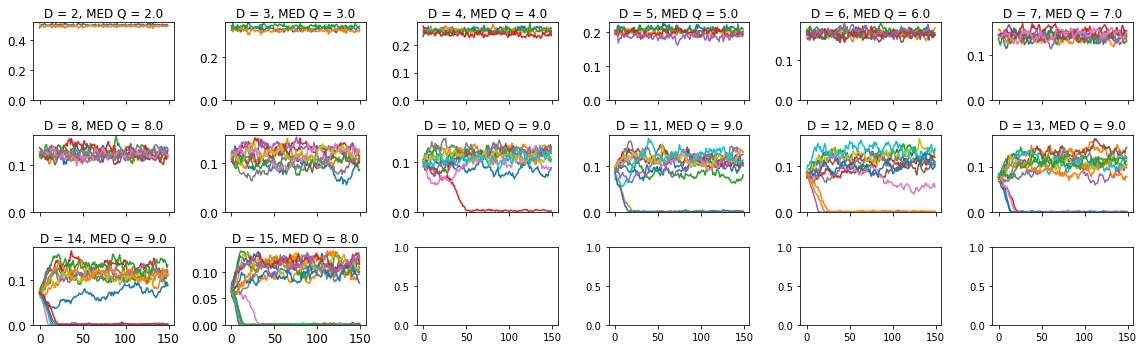

In [10]:
fig, axs = plt.subplots(3, 6, figsize=(16, 5), tight_layout=True, sharex=True)
for ax, D, ths_all, q_med_fd in zip(axs.flat, DS, ths_alls, q_med_fds):
    ths = ths_all[0]
    ax.plot(ths)
    ax.set_ylim(bottom=0)
    set_plot(ax, title=f'D = {D}, MED Q = {q_med_fd}')

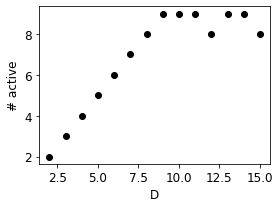

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
ax.scatter(DS, q_med_fds, c='k')
set_plot(ax, x_label='D', y_label='# active')

# Save

In [12]:
np.save('data/multistability/n_active_full.npy', np.array([{
    'DS': DS,
    'N': N,
    'q_med_mds': q_med_mds,
    'q_med_fds': q_med_fds,
}]))